In [8]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
insurance_data = pd.read_csv("insurance.csv")

#interaction features
X=insurance_data.drop(columns = ["charges"])
y=insurance_data["charges"]

X=pd.get_dummies(X,columns=["region"], drop_first=True, dtype= int)# for hadling multicollinearity problems o
#dummy variable trap 

X["sex"] = X["sex"].map({"female":1, "male": 0})
X["smoker"] = X["smoker"].map({"yes":1, "no": 0})
X["age_smoker"] = X["age"] * X["smoker"]
X["bmi_smoker"] = X["bmi"]* X["smoker"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


MSE for alpha =0.001:  20922599.87103596
MSE for alpha =0.01:  20922527.32662988
MSE for alpha =1:  20914832.635089133
MSE for alpha =2:  20908106.77995452
MSE for alpha =5:  20890881.000633497
MSE for alpha =10:  20872844.794796687
MSE for alpha =20:  20877828.53237883
MSE for alpha =30:  20937537.133939777
MSE for alpha =40:  21046489.29389078
MSE for alpha =50:  21196929.869608905
MSE for alpha =100:  22423172.686023258


<Axes: >

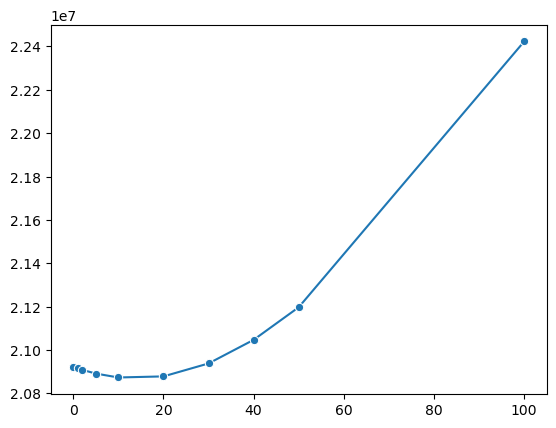

In [4]:
alphas=[0.001, 0.01,1,2,5,10,20,30,40,50,100]
mses = []
for a in alphas:
    
    lasso_model = Lasso(a)
    lasso_model.fit(X_train, y_train)
    
    y_pred = lasso_model.predict(X_test)
    mse =  mean_squared_error(y_test, y_pred)
    print(f"MSE for alpha ={a}: ",mse)
    mses.append(mse)
sns.lineplot(x=alphas, y=mses, marker="o")

In [9]:
#lasso regression
from sklearn.linear_model import LassoCV

a=[0.001, 0.01,1,2,5,10,20,30,40,50,100]

lasso_cv_model = LassoCV(
    alphas = a,
    cv =5,
    max_iter = 1000,
    random_state = 42
)

lasso_cv_model.fit(X_train, y_train)

print("best alpha :",lasso_cv_model.alpha_)

y_pred = lasso_cv_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)

r2 = r2_score(y_test,y_pred)
print("r2 Score:",r2)

best alpha : 0.001
MSE: 20922599.87103596
r2 Score: 0.8652317499151699


In [16]:
#ridge regression
from sklearn.linear_model import RidgeCV

a=[0.001, 0.01,1,2,5,10,20,30,40,50,100]

Ridge_cv_model = RidgeCV(
    alphas = a
)

Ridge_cv_model.fit(X_train, y_train)

print("best alpha :",Ridge_cv_model.alpha_)

y_pred = Ridge_cv_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)

r2 = r2_score(y_test, y_pred)
print("r2 for ridgecv",r2)

best alpha : 0.01
MSE: 20920713.867738746
r2 for ridgecv 0.8652438981838166
